# API pull from coinmarketcap website

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'abd34da3c22c49f79395bd8406dbb12f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

# i had to go in my anaconda prompt and put 'jupyter notebook --NotebookApp.iopub_data_rate_limit = 1e10' to make it work and i copied the url
# i also reduce the limit figure to 50 which worked, it was a tough challenge here

In [2]:
#type(data)

In [3]:
import pandas as pd #importing library

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])  # this normalize the dataset and makes it all pretty in a dataframe

df['timestamp'] = pd.to_datetime('now') #creating timestamp to make everything have a time it downloaded

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12562,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.999121e+07,1.999121e+07,False,1.356769e+12,NaN,1,NaN,NaN,None,2026-02-18T06:41:00.000Z,67868.306048,3.319469e+10,-0.9523,0.286734,-0.816160,1.414289,-26.613063,-23.112756,-26.292610,1.356769e+12,58.0676,1.425234e+12,None,2026-02-18T06:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 07:44:35.344360
1,1027,Ethereum,ETH,ethereum,11576,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206924e+08,1.206924e+08,True,2.418793e+11,NaN,2,NaN,NaN,None,2026-02-18T06:42:00.000Z,2004.096440,2.025302e+10,5.1482,0.292436,1.118671,2.490746,-37.208750,-32.786784,-33.613028,2.418793e+11,10.3521,2.418793e+11,None,2026-02-18T06:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 07:44:35.344360
2,825,Tether USDt,USDT,tether,171323,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.837416e+11,1.879558e+11,True,1.878649e+11,NaN,3,NaN,NaN,None,2026-02-18T06:41:00.000Z,0.999516,7.113448e+10,0.1680,0.006057,-0.011569,0.017634,-0.003871,0.002309,0.016385,1.836527e+11,7.8601,1.878649e+11,None,2026-02-18T06:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-02-18 07:44:35.344360
3,52,XRP,XRP,xrp,1799,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.091732e+10,9.998572e+10,False,1.480373e+11,NaN,4,NaN,NaN,None,2026-02-18T06:42:00.000Z,1.480584,2.328290e+09,-16.8770,0.105449,0.317222,8.141894,-24.318972,-22.646557,-30.445888,9.019321e+10,3.8601,1.480584e+11,None,2026-02-18T06:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 07:44:35.344360
4,1839,BNB,BNB,bnb,3135,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.363592e+08,1.363592e+08,1.363592e+08,False,8.417675e+10,NaN,5,NaN,NaN,None,2026-02-18T06:41:00.000Z,617.316297,1.217587e+09,-13.5410,0.124789,-1.081585,2.478427,-33.200979,-27.629633,-31.865706,8.417675e+10,3.6026,8.417675e+10,None,2026-02-18T06:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 07:44:35.344360
5,3408,USDC,USDC,usd-coin,37519,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.352183e+10,7.352183e+10,False,7.351997e+10,NaN,6,6.090122e+10,6.089968e+10,None,2026-02-18T06:41:00.000Z,0.999975,1.013850e+10,14.2661,0.011763,-0.005871,-0.003413,0.012184,0.012806,0.000795,7.351997e+10,3.1465,7.351997e+10,None,2026-02-18T06:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-02-18 07:44:35.344360
6,5426,Solana,SOL,solana,1089,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.682397e+08,6.206610e+08,True,5.281270e+10,NaN,7,5.252369e+08,4.469296e+10,None,2026-02-18T06:42:00.000Z,85.091054,3.108354e+09,-7.6631,0.299004,-1.748099,4.672379,-35.981580,-32.658224,-40.605395,4.835211e+10,2.0694,5.281270e+10,None,2026-02-18T06:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 07:44:35.344360
7,1958,TRON,TRX,tron,1300,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.472796e+10,9.472796e+10,True,2.666017e+10,NaN,8,9.466789e+10,2.664326e+10,None,2026-02-18T06:42:00.000Z,0.281439,5.529253e+08,-4.9657,-0.174025,-1.112361,2.511488,-11.504725,0.790577,-2.011115,2.666017e+10,1.1410,2.666017e+10,None,2026-02-1

## Converting it to a CSV file

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'abd34da3c22c49f79395bd8406dbb12f',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
     #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])  # this normalize the dataset and makes it all pretty in a dataframe

    df['timestamp'] = pd.to_datetime('now') #creating timestamp to make everything have a time it downloaded

    df


    if not os.path.isfile(r'C:\Users\Samsung\Documents\Career Paths\Data_analysis\Datasets\API.csv'):
        df.to_csv(r'C:\Users\Samsung\Documents\Career Paths\Data_analysis\Datasets\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\Samsung\Documents\Career Paths\Data_analysis\Datasets\API.csv', mode = 'a', header= False)
# to convert and download as csv

In [6]:
import os
from time import time
from time import sleep

for i in range(333): # as a result of the call perday on the site
    api_runner()
    print('API Runner accomplished')
    sleep(60) # sleep for 1 minute
exit()

API Runner accomplished
API Runner accomplished
API Runner accomplished
API Runner accomplished


KeyboardInterrupt: 

In [40]:
df15 = pd.read_csv(r'C:\Users\Samsung\Documents\Career Paths\Data_analysis\Datasets\API.csv')
df15

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12562,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19991206.00,19991206.00,False,1356769287077.04,NaN,1,NaN,NaN,NaN,2026-02-18T06:41:00.000Z,67868.31,33194693846.72,-0.95,0.29,-0.82,1.41,-26.61,-23.11,-26.29,1356769287077.04,58.07,1425234427008.45,NaN,2026-02-18T06:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 07:44:36.460037
1,1,1027,Ethereum,ETH,ethereum,11576,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120692424.04,120692424.04,True,241879257318.33,NaN,2,NaN,NaN,NaN,2026-02-18T06:42:00.000Z,2004.10,20253024668.66,5.15,0.29,1.12,2.49,-37.21,-32.79,-33.61,241879257318.34,10.35,241879257318.33,NaN,2026-02-18T06:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 07:44:36.460037
2,2,825,Tether USDt,USDT,tether,171323,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,183741587995.22,187955768182.37,True,187864863633.42,NaN,3,NaN,NaN,NaN,2026-02-18T06:41:00.000Z,1.00,71134481444.47,0.17,0.01,-0.01,0.02,-0.00,0.00,0.02,183652721628.73,7.86,187864863633.42,NaN,2026-02-18T06:41:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-02-18 07:44:36.460037
3,3,52,XRP,XRP,xrp,1799,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00,60917315351.00,99985721048.00,False,148037267113.60,NaN,4,NaN,NaN,NaN,2026-02-18T06:42:00.000Z,1.48,2328289777.73,-16.88,0.11,0.32,8.14,-24.32,-22.65,-30.45,90193207489.40,3.86,148058408302.65,NaN,2026-02-18T06:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 07:44:36.460037
4,4,1839,BNB,BNB,bnb,3135,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",136359182.62,136359182.14,136359182.14,False,84176745387.02,NaN,5,NaN,NaN,NaN,2026-02-18T06:41:00.000Z,617.32,1217587128.42,-13.54,0.12,-1.08,2.48,-33.20,-27.63,-31.87,84176745387.02,3.60,84176745683.33,NaN,2026-02-18T06:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 07:44:36.460037
5,5,3408,USDC,USDC,usd-coin,37519,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,73521833679.53,73521833679.53,False,73519974596.84,NaN,6,60901219650.23,60899679694.04,NaN,2026-02-18T06:41:00.000Z,1.00,10138503500.98,14.27,0.01,-0.01,-0.00,0.01,0.01,0.00,73519974596.84,3.15,73519974596.84,NaN,2026-02-18T06:41:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-02-18 07:44:36.460037
6,6,5426,Solana,SOL,solana,1089,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,568239670.18,620660973.04,True,52812696467.57,NaN,7,525236893.30,44692960931.20,NaN,2026-02-18T06:42:00.000Z,85.09,3108353697.48,-7.66,0.30,-1.75,4.67,-35.98,-32.66,-40.61,48352112547.40,2.07,52812696467.57,NaN,2026-02-18T06:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 07:44:36.460037
7,7,1958,TRON,TRX,tron,1300,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,94727963610.38,94727959550.94,True,26660168958.46,NaN,8,94667886298.43,26643261985.38,NaN,2026-02-18T06:42:00.000Z,0.28,552925346.95,-4.97,-0.17,-1.11,2.51,-11.50,0.79,-2.01,26660170100.94,1.14,26660168958.46,NaN,2026-02-18T06:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 07:44:36.460037
8,8,74,Dogecoin,DOGE,dogecoin,1401,2013-12-15T00:00:00.000Z,"['mineable', 'pow'

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # to make the figures show fullyand round up to 2 decimals

In [10]:
df.head(2)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12562,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19991206.00,19991206.00,False,1357130274024.92,NaN,1,NaN,NaN,None,2026-02-18T06:45:00.000Z,67886.36,33374821992.83,-0.36,0.43,-0.79,1.69,-26.63,-23.09,-26.10,1357130274024.92,58.05,1425613630039.30,None,2026-02-18T06:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 07:47:42.608872
1,1027,Ethereum,ETH,ethereum,11576,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120692424.04,120692424.04,True,241899269583.09,NaN,2,NaN,NaN,None,2026-02-18T06:45:00.000Z,2004.26,20385584273.79,6.14,0.32,1.19,2.78,-37.22,-32.77,-33.49,241899269583.09,10.35,241899269583.09,None,2026-02-18T06:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 07:47:42.608872


## Preparing to plot

In [13]:
df40 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df40

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.43,-0.79,1.69,-26.63,-23.09,-26.10
Ethereum,0.32,1.19,2.78,-37.22,-32.77,-33.49
Tether USDt,0.01,-0.00,0.02,-0.01,-0.00,0.05
XRP,0.25,0.20,8.40,-24.20,-22.62,-30.32
BNB,0.13,-1.16,2.61,-33.18,-27.64,-31.71
USDC,0.01,0.01,0.00,0.02,0.01,0.02
Solana,0.36,-1.79,4.89,-35.98,-32.64,-40.50
TRON,-0.13,-1.10,2.50,-11.43,0.82,-1.97
Dogecoin,0.28,1.12,11.42,-20.14,-22.89,-35.50


In [14]:
df20 = df40.stack()
df20

name                                      
Bitcoin       quote.USD.percent_change_1h      0.43
              quote.USD.percent_change_24h    -0.79
              quote.USD.percent_change_7d      1.69
              quote.USD.percent_change_30d   -26.63
              quote.USD.percent_change_60d   -23.09
              quote.USD.percent_change_90d   -26.10
Ethereum      quote.USD.percent_change_1h      0.32
              quote.USD.percent_change_24h     1.19
              quote.USD.percent_change_7d      2.78
              quote.USD.percent_change_30d   -37.22
              quote.USD.percent_change_60d   -32.77
              quote.USD.percent_change_90d   -33.49
Tether USDt   quote.USD.percent_change_1h      0.01
              quote.USD.percent_change_24h    -0.00
              quote.USD.percent_change_7d      0.02
              quote.USD.percent_change_30d    -0.01
              quote.USD.percent_change_60d    -0.00
              quote.USD.percent_change_90d     0.05
XRP           quote.U

In [15]:
type(df20)

pandas.core.series.Series

In [18]:
df21 = df20.to_frame(name= 'values')
df21

values
name                                             
Bitcoin      quote.USD.percent_change_1h     0.43
             quote.USD.percent_change_24h   -0.79
             quote.USD.percent_change_7d     1.69
             quote.USD.percent_change_30d  -26.63
             quote.USD.percent_change_60d  -23.09
             quote.USD.percent_change_90d  -26.10
Ethereum     quote.USD.percent_change_1h     0.32
             quote.USD.percent_change_24h    1.19
             quote.USD.percent_change_7d     2.78
             quote.USD.percent_change_30d  -37.22
             quote.USD.percent_change_60d  -32.77
             quote.USD.percent_change_90d  -33.49
Tether USDt  quote.USD.percent_change_1h     0.01
             quote.USD.percent_change_24h   -0.00
             quote.USD.percent_change_7d     0.02
             quote.USD.percent_change_30d   -0.01
             quote.USD.percent_change_60d   -0.00
             quote.USD.percent_change_90d    0.05
XRP          quote.USD.percent_change_1h     0.25
             quote.USD.percent_change_24h    0.20
             quote.USD.percent_change_7d     8.40
             quote.USD.percent_change_30d  -24.20
             quote.USD.percent_change_60d  -22.62
             quote.USD.percent_change_90d  -30.32
BNB          quote.USD.percent_change_1h     0.13
             quote.USD.percent_change_24h   -1.16
             quote.USD.percent_change_7d     2.61
             quote.USD.percent_change_30d  -33.18
             quote.USD.percent_change_60d  -27.64
             quote.USD.percent_change_90d  -31.71
USDC         quote.USD.percent_change_1h     0.01
             quote.USD.percent_change_24h    0.01
             quote.USD.percent_change_7d     0.00
             quote.USD.percent_change_30d    0.02
             quote.USD.percent_change_60d    0.01
             quote.USD.percent_change_90d    0.02
Solana       quote.USD.percent_change_1h     0.36
             quote.USD.percent_change_24h   -1.79
             quote.USD.percent_change_7d     4.89
             quote.USD.percent_change_30d  -35.98
             quote.USD.percent_change_60d  -32.64
             quote.USD.percent_change_90d  -40.50
TRON         quote.USD.percent_change_1h    -0.13
             quote.USD.percent_change_24h   -1.10
             quote.USD.percent_change_7d     2.50
             quote.USD.percent_change_30d  -11.43
             quote.USD.percent_change_60d    0.82
             quote.USD.percent_change_90d   -1.97
Dogecoin     quote.USD.percent_change_1h     0.28
             quote.USD.percent_change_24h    1.12
             quote.USD.percent_change_7d    11.42
             quote.USD.percent_change_30d  -20.14
             quote.USD.percent_change_60d  -22.89
             quote.USD.percent_change_90d  -35.50
Bitcoin Cash quote.USD.percent_change_1h     0.08
             quote.USD.percent_change_24h    0.85
             quote.USD.percent_change_7d     9.51
             quote.USD.percent_change_30d   -4.14
             quote.USD.percent_change_60d   -6.46
             quote.USD.percent_change_90d   13.41

In [19]:
type(df21)

pandas.core.frame.DataFrame

In [20]:
df21.count() # counting the number of data to use it in next line of code

values    60
dtype: int64

In [22]:
index = pd.Index(range(60)) #resetting the index to make everthing align with 1 index

df22 = df21.reset_index()

df22

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.43
1,Bitcoin,quote.USD.percent_change_24h,-0.79
2,Bitcoin,quote.USD.percent_change_7d,1.69
3,Bitcoin,quote.USD.percent_change_30d,-26.63
4,Bitcoin,quote.USD.percent_change_60d,-23.09
5,Bitcoin,quote.USD.percent_change_90d,-26.10
6,Ethereum,quote.USD.percent_change_1h,0.32
7,Ethereum,quote.USD.percent_change_24h,1.19
8,Ethereum,quote.USD.percent_change_7d,2.78
9,Ethereum,quote.USD.percent_change_30d,-37.22


In [25]:
df23 = df22.rename(columns={'level_1': 'pct%'})
df23

,name,pct%,values
0,Bitcoin,quote.USD.percent_change_1h,0.43
1,Bitcoin,quote.USD.percent_change_24h,-0.79
2,Bitcoin,quote.USD.percent_change_7d,1.69
3,Bitcoin,quote.USD.percent_change_30d,-26.63
4,Bitcoin,quote.USD.percent_change_60d,-23.09
5,Bitcoin,quote.USD.percent_change_90d,-26.10
6,Ethereum,quote.USD.percent_change_1h,0.32
7,Ethereum,quote.USD.percent_change_24h,1.19
8,Ethereum,quote.USD.percent_change_7d,2.78
9,Ethereum,quote.USD.percent_change_30d,-37.22


## Plotting

In [27]:
import seaborn as sns # importing library to plot
from matplotlib import pyplot as plt


In [31]:
df23['pct%'] = df23['pct%'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1hr','24hr','7d','30d','60d','90d'])
# replacing those pct% to make the data short for plotting
df23

,name,pct%,values
0,Bitcoin,1hr,0.43
1,Bitcoin,24hr,-0.79
2,Bitcoin,7d,1.69
3,Bitcoin,30d,-26.63
4,Bitcoin,60d,-23.09
5,Bitcoin,90d,-26.10
6,Ethereum,1hr,0.32
7,Ethereum,24hr,1.19
8,Ethereum,7d,2.78
9,Ethereum,30d,-37.22


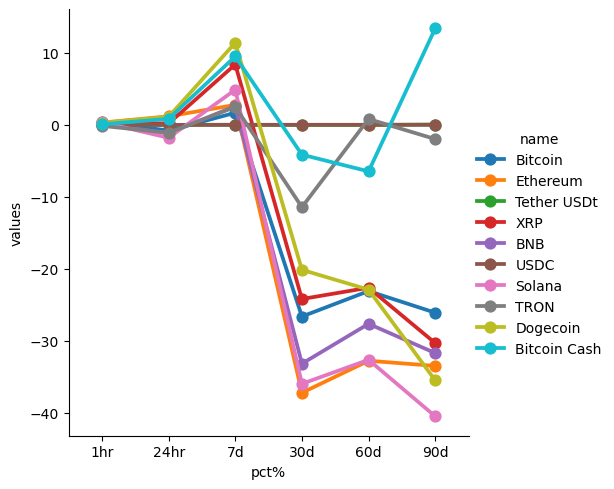

In [32]:
sns.catplot(x='pct%',y='values',hue='name',data=df23,kind='point')  # plotting


In [68]:
df30 = df15[['name','quote.USD.price','timestamp']]  # cutting down the data i need for plotting

df30 = df30[df30['name']== 'Bitcoin']

df30 

,name,quote.USD.price,timestamp
0,Bitcoin,67868.31,2026-02-18 07:44:36.460037
10,Bitcoin,67870.17,2026-02-18 07:45:37.829341
20,Bitcoin,67891.14,2026-02-18 07:46:39.128956
30,Bitcoin,67886.36,2026-02-18 07:47:42.608872


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

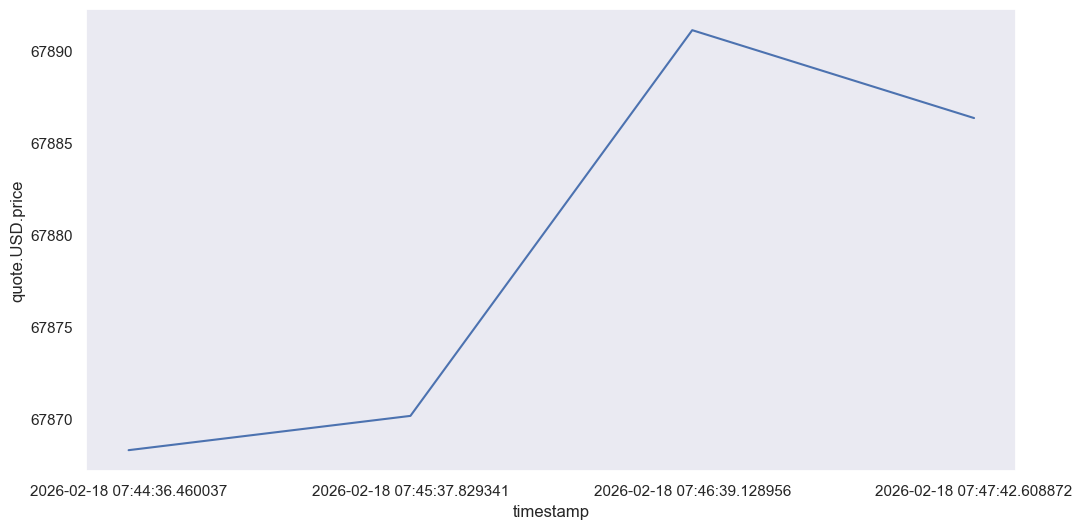

In [69]:
sns.set_theme(style='dark') # using the data of bitcoin to create a lineplot using seaborn

plt.figure(figsize=(12, 6))

sns.lineplot(x='timestamp',y='quote.USD.price',data=df30)
